___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv('store_sharing.csv', encoding="windows-1252")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
df['timestamp'] = pd. to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [5]:
# Yinelenen satırları seçelim
df.loc[df.duplicated(keep=False), :]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-06-29 06:00:00,725,15.5,15.5,74.5,9.0,1.0,0.0,0.0,1.0
2015-07-07 05:00:00,159,17.0,17.0,68.0,11.0,1.0,0.0,0.0,1.0
2016-07-07 02:00:00,159,17.0,17.0,68.0,11.0,1.0,0.0,0.0,1.0
2016-08-30 06:00:00,725,15.5,15.5,74.5,9.0,1.0,0.0,0.0,1.0


In [6]:
# Yinelenen satırları temizleyelim
df.drop_duplicates(inplace=True)

In [7]:
# son durumu kontrol edelim
df.duplicated().value_counts()

False    17412
dtype: int64

In [10]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [11]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17412.000000,17412.000000,17412.000000,17412.000000,17412.000000,17412.000000,17412.000000,17412.000000,17412.000000
mean,1143.182173,12.467656,11.520293,72.325078,15.913742,2.722950,0.022054,0.285435,1.492132
std,1085.140131,5.571984,6.615326,14.313961,7.894762,2.341225,0.146863,0.451634,1.118963
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1672.000000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

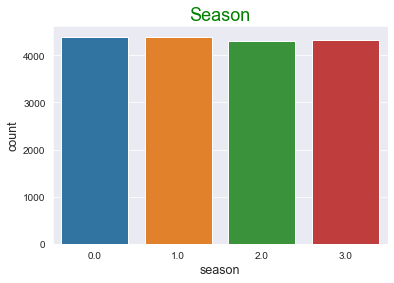

In [10]:
fig, ax = plt.subplots()
sns.countplot(x="season", data=df)
ax.set_title("Season", color="green")

rc={'axes.labelsize': 12.5, 'font.size': 10, 'axes.titlesize': 18}
sns.set_context(rc=rc);

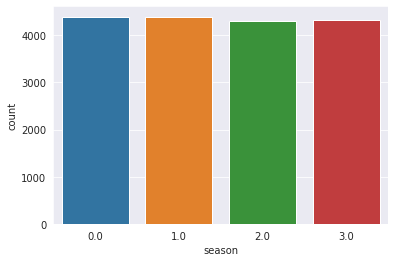

In [ ]:
# season



<hr>

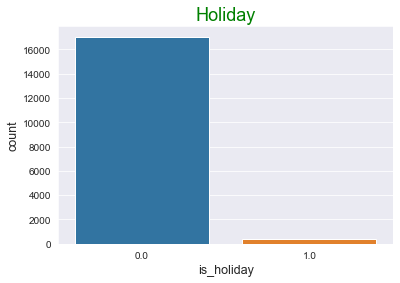

In [11]:
fig, ax = plt.subplots()
sns.countplot(x="is_holiday", data=df)
ax.set_title("Holiday", color="green")

rc={'axes.labelsize': 12.5, 'font.size': 10, 'axes.titlesize': 18}
sns.set_context(rc=rc);

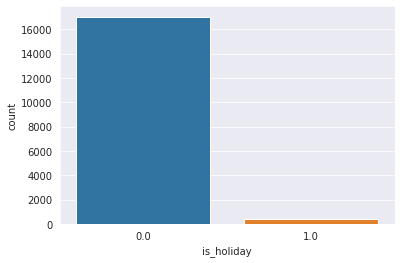

In [ ]:
# is_holiday


<hr>

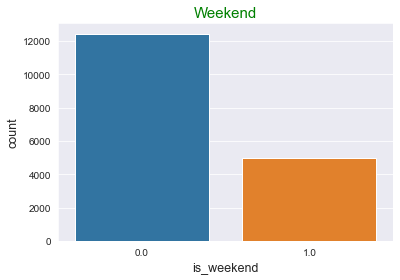

In [12]:
fig, ax = plt.subplots()
sns.countplot(x="is_weekend", data=df)
ax.set_title("Weekend", color="green", fontsize=15)

rc={'axes.labelsize': 12.5, 'font.size': 10, 'axes.titlesize': 18}
sns.set_context(rc=rc);

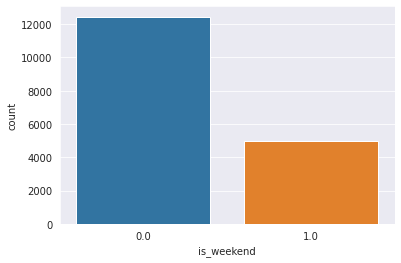

In [ ]:
# is_weekend


<hr>

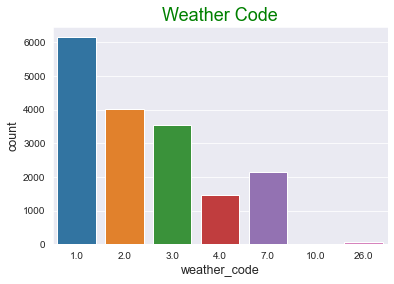

In [13]:
fig, ax = plt.subplots()
sns.countplot(x="weather_code", data=df)
ax.set_title("Weather Code", color="green")


rc={'axes.labelsize': 12.5, 'font.size': 10, 'axes.titlesize': 18}
sns.set_context(rc=rc);

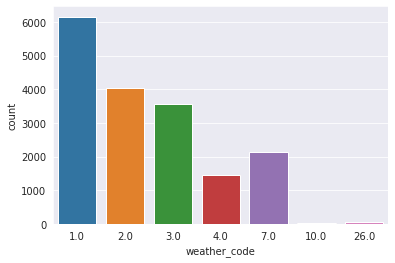

In [ ]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [12]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [95]:
df['year_month'] = df.index.to_period('M')
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

In [14]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [15]:
df.isnull().sum()/len(df)*100

cnt             0.0
t1              0.0
t2              0.0
hum             0.0
wind_speed      0.0
weather_code    0.0
is_holiday      0.0
is_weekend      0.0
season          0.0
year_month      0.0
year            0.0
month           0.0
day_of_month    0.0
day_of_week     0.0
hour            0.0
dtype: float64

### 7.Visualize the correlation with a heatmap

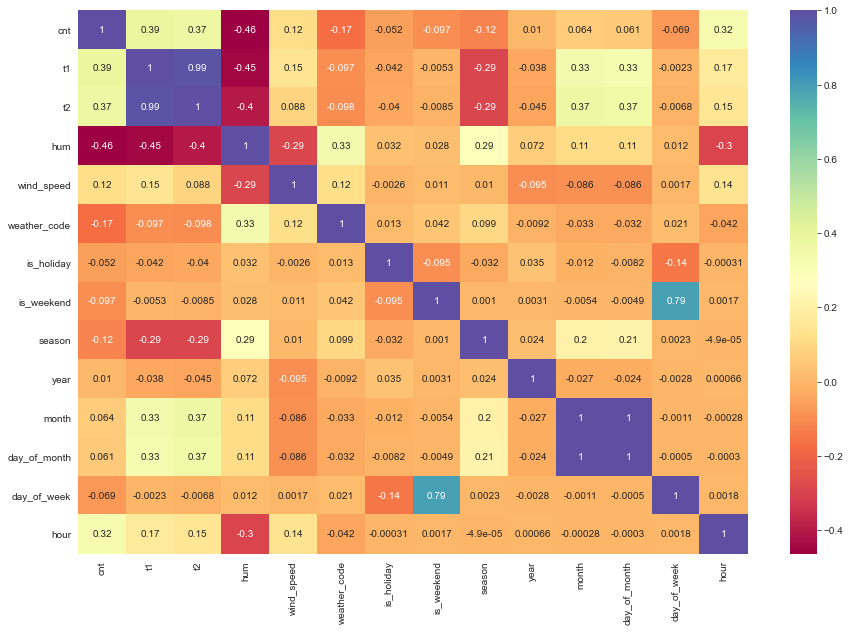

In [17]:
# Korelasyon matrisini hesapla
df_corr = df.corr()

f, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df_corr, annot=True, cmap='Spectral')

rc={'font.size': 11}
sns.set_context(rc=rc);

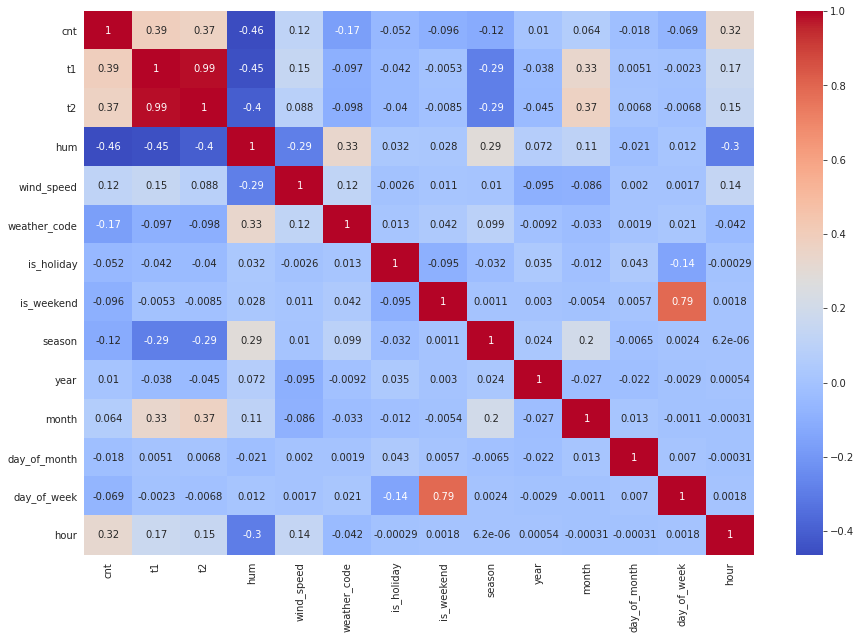

In [ ]:
# for all variables 


<hr>

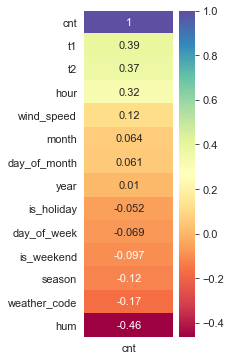

In [18]:
df_corr = df.corr().sort_values(ascending=False,by='cnt')

f, ax = plt.subplots(figsize=(2,6))

sns.heatmap(df_corr.iloc[:,:1], annot=True, cmap='Spectral')

rc={'font.size': 11}
sns.set_context(rc=rc);

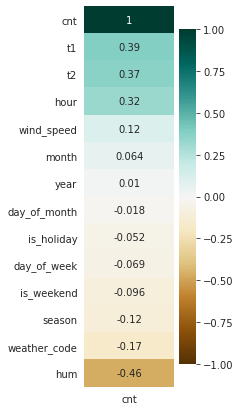

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

In [19]:
df_corr_y = df.corr().sort_values(ascending=False,by='cnt').index

In [20]:
df_corr_x = df.corr().sort_values(ascending=False,by='cnt').iloc[:,:1]
df_corr_x

,cnt
cnt,1.000000
t1,0.388874
t2,0.369113
hour,0.324367
wind_speed,0.116251
month,0.063776
day_of_month,0.061489
year,0.010119
is_holiday,-0.051711
day_of_week,-0.068714


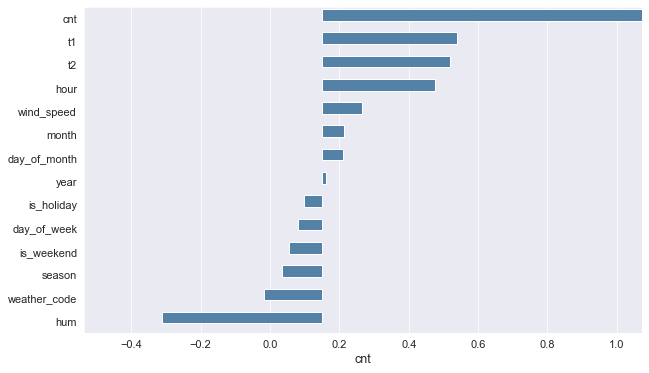

In [21]:
#with seaborn

f, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='cnt',
            y=df_corr_x.index,
            data = df_corr_x,
            color="steelblue"
           )

def change_height(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_height()
        diff = current_width - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_height(ax, .5)
plt.show()


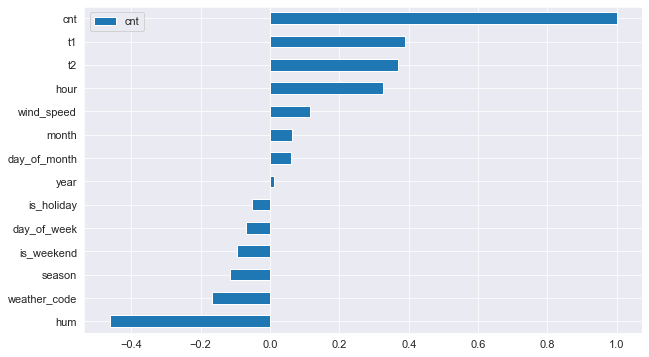

In [28]:
df.corr().sort_values(ascending=True,by='cnt').iloc[:,:1].plot.barh(rot=0,figsize=(10,6));

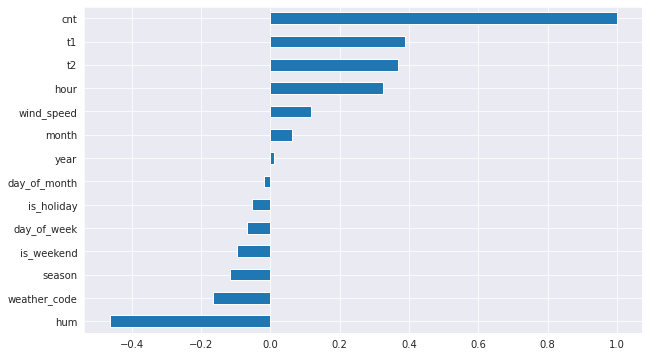

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

In [30]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


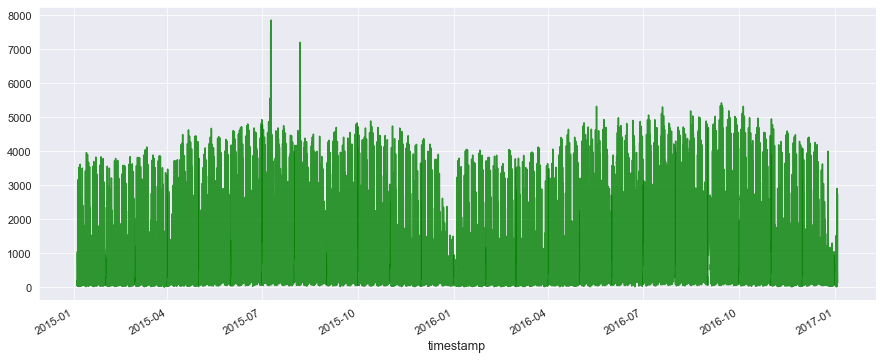

In [89]:
bike_share = df.groupby("year_month").cnt
bike_share.plot(figsize=(15,6),color='green',alpha=0.8);

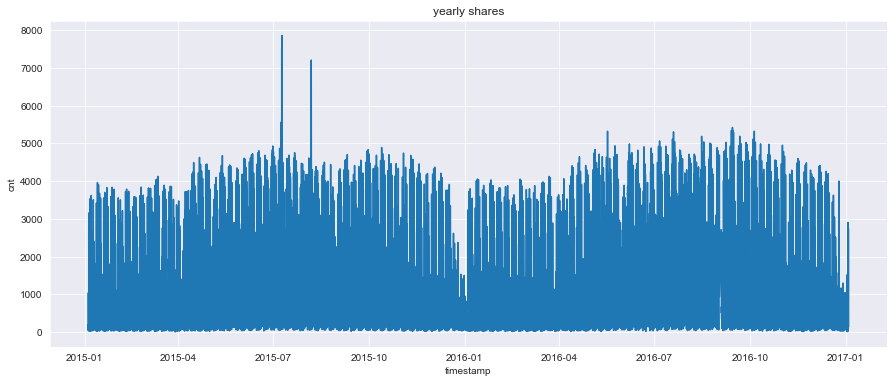

In [19]:
plt.figure(figsize=(15,6))
sns.lineplot(df.index,'cnt',data=df)
plt.title('yearly shares')
plt.show()

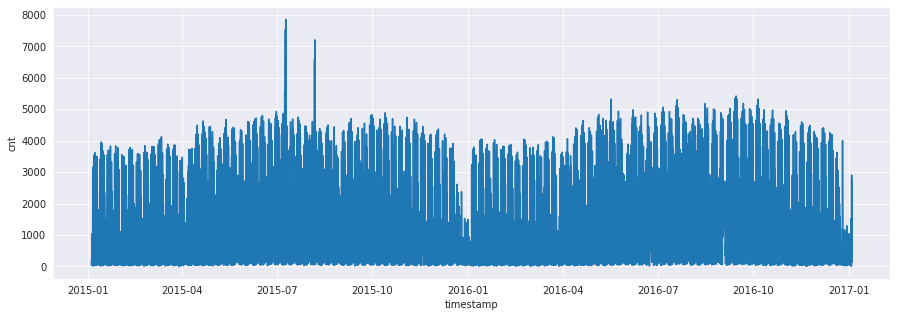

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [109]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


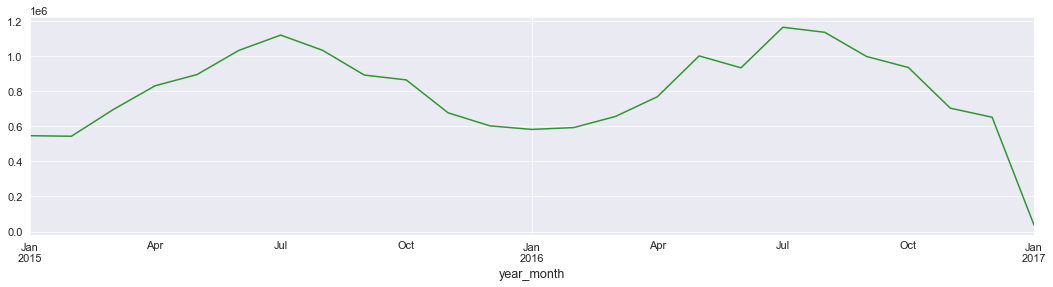

In [115]:
bike_share = df.groupby("year_month").cnt.sum()
bike_share.plot(figsize=(18,4),color='green',alpha=0.8);

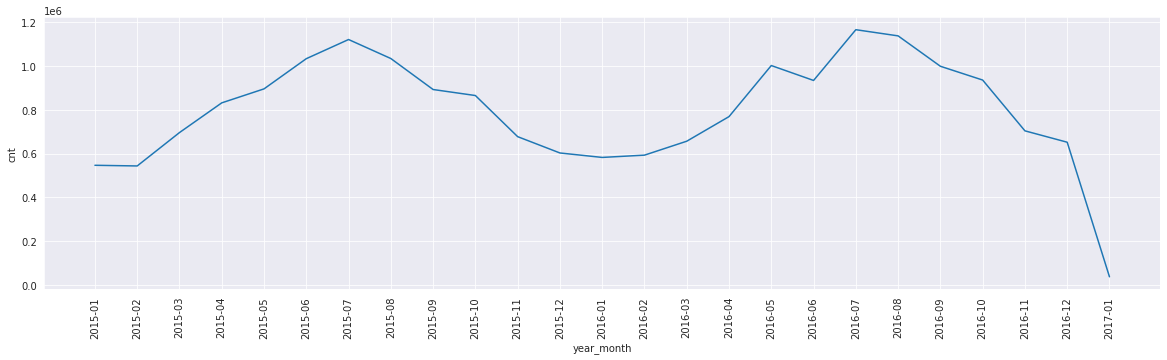

In [ ]:
# with lineplot


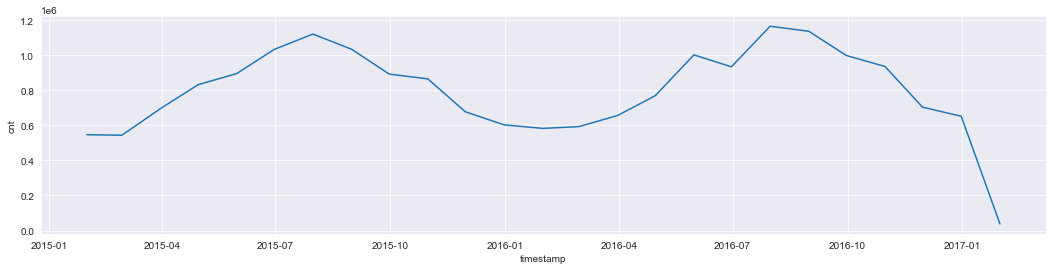

In [40]:
df_by_month = df.resample('M').sum()
plt.figure(figsize=(18,4))

sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month);

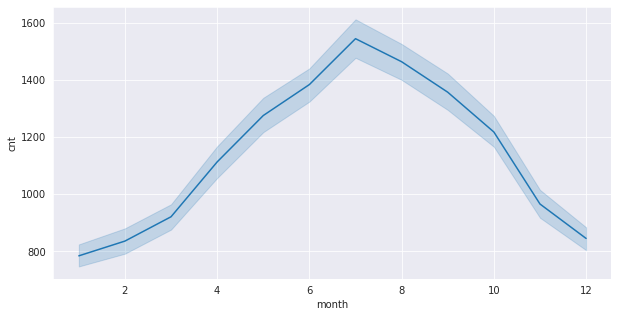

In [ ]:
# with lineplot


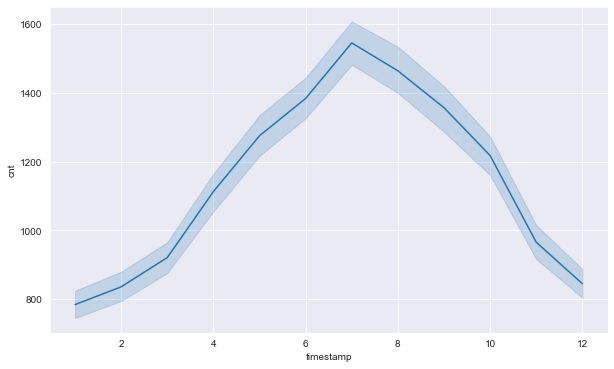

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(df.index.month,'cnt',data=df)
plt.show()

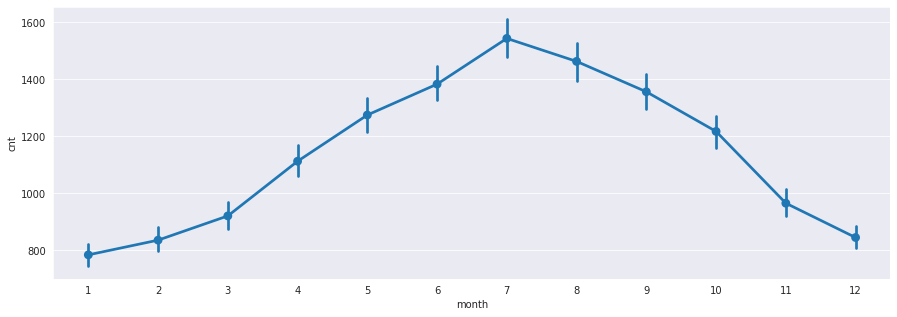

In [ ]:
# with pointplot


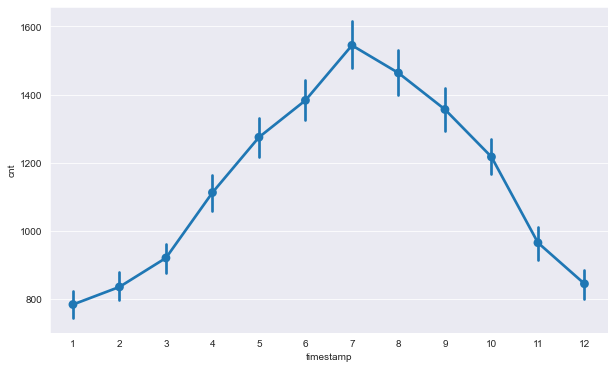

In [26]:
plt.figure(figsize=(10,6))
sns.pointplot(df.index.month,'cnt',data=df)
plt.show()

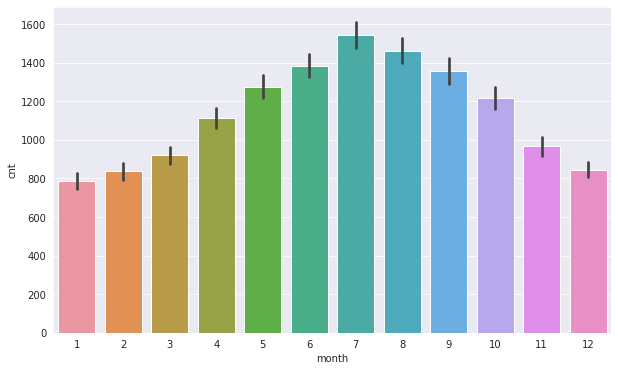

In [ ]:
# with barplot


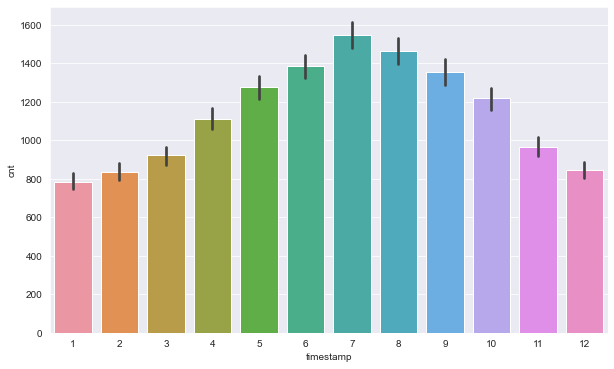

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(df.index.month,'cnt',data=df)
plt.show()

### 11.Plot bike shares by hours on (holidays, weekend, season)

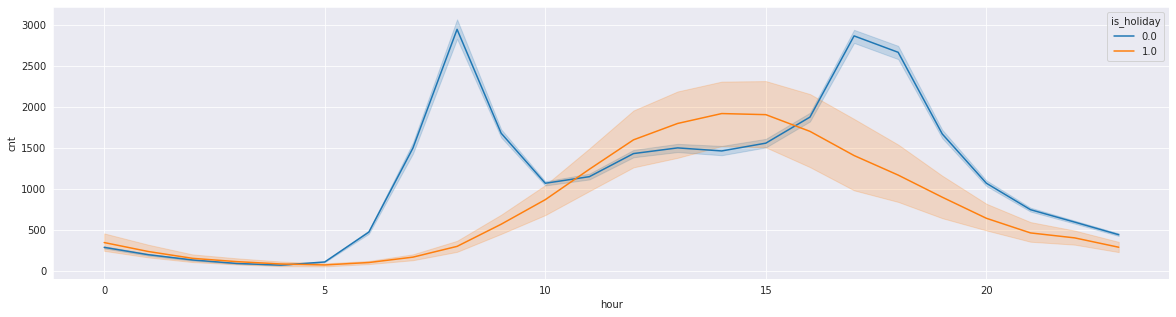

In [ ]:
# with lineplot (*whether it is a holiday or not*)


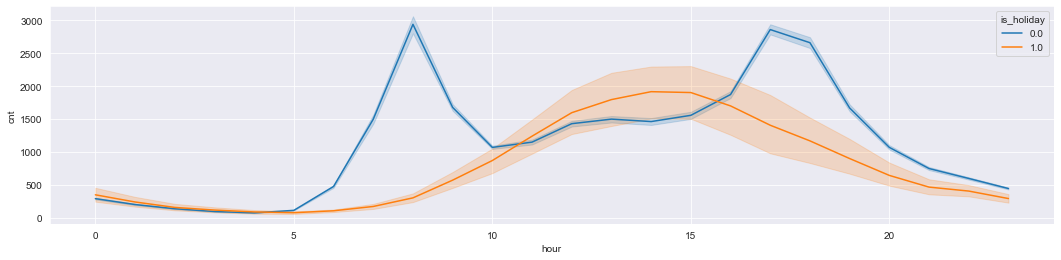

In [31]:
plt.figure(figsize=(18,4))
sns.lineplot('hour','cnt',data=df,hue='is_holiday')
plt.show()

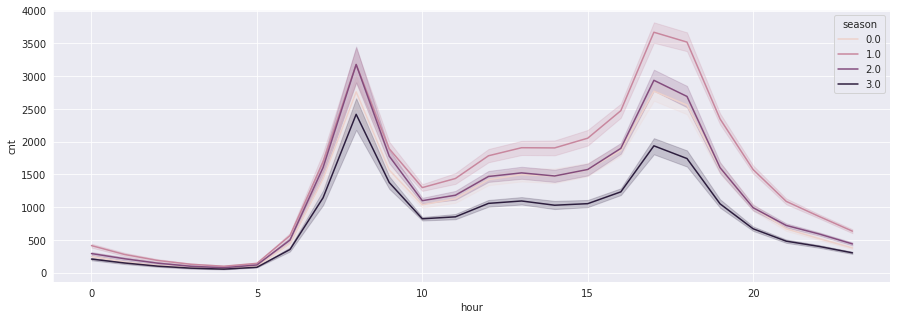

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


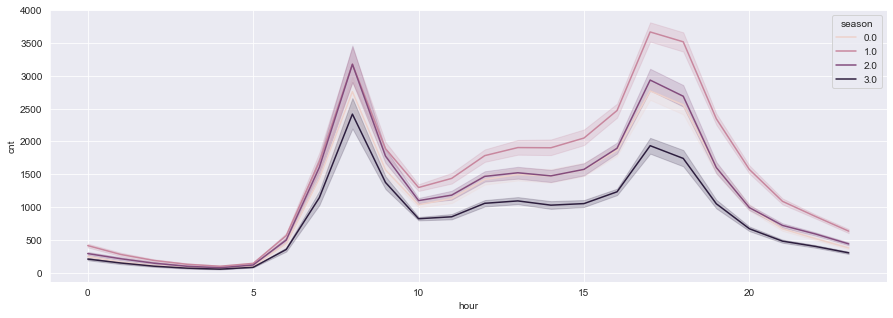

In [36]:
plt.figure(figsize=(15,5))
sns.lineplot('hour','cnt',data=df,hue='season')
plt.show()

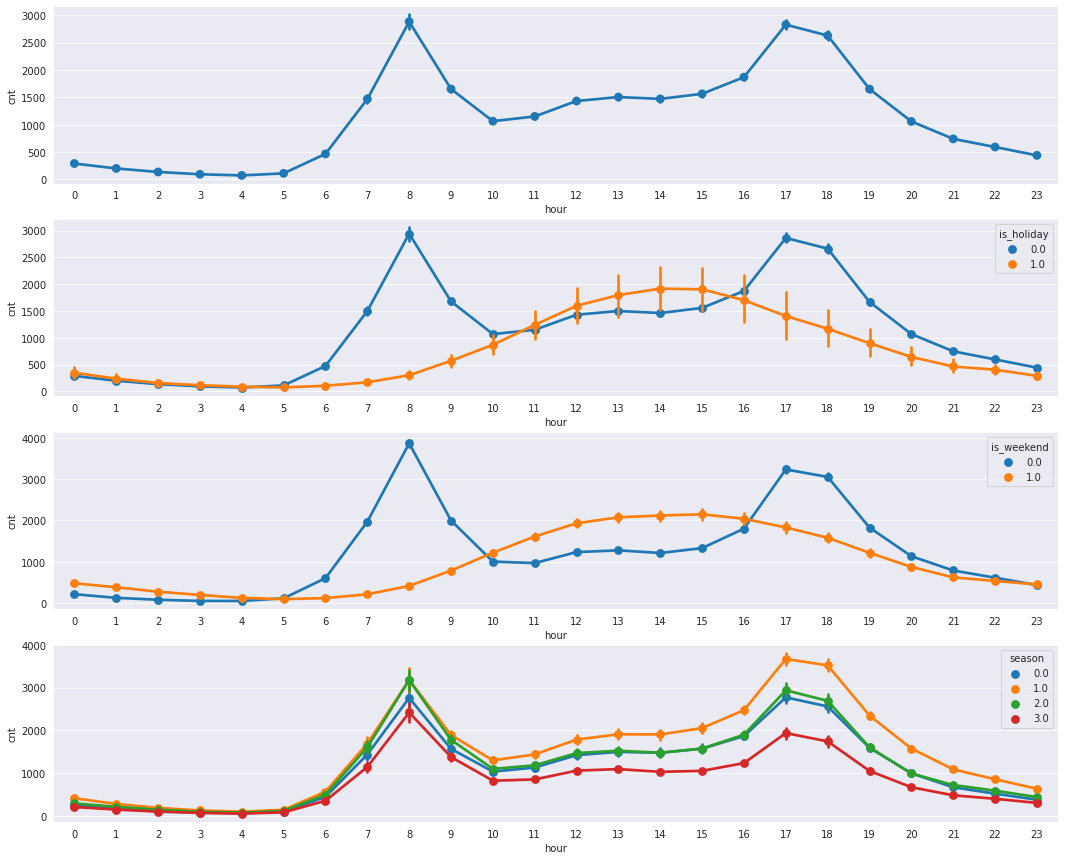

In [ ]:
# with pointplot


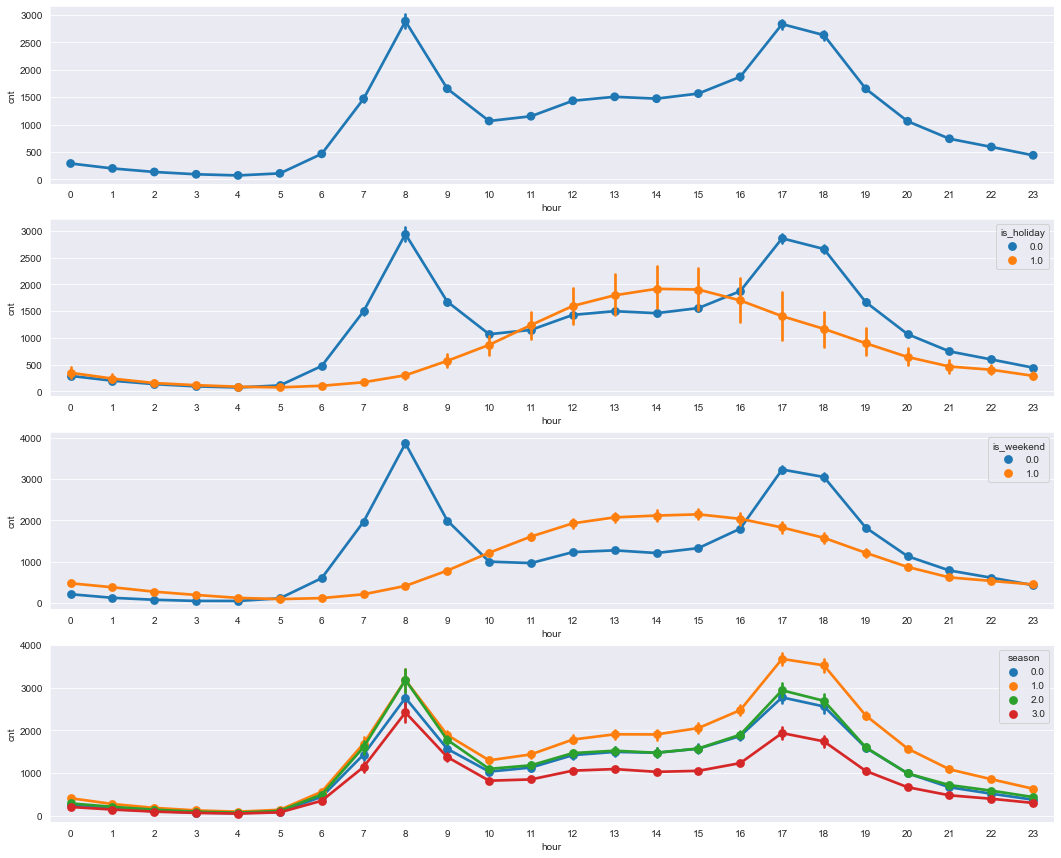

In [66]:
fig, axes = plt.subplots(4, 1, figsize=(18, 15))
sns.pointplot('hour','cnt',data=df,ax=axes[0])
sns.pointplot('hour','cnt',data=df,ax=axes[1], hue='is_holiday')
sns.pointplot('hour','cnt',data=df,ax=axes[2], hue='is_weekend')
sns.pointplot('hour','cnt',data=df,ax=axes[3], hue='season')

plt.show()

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

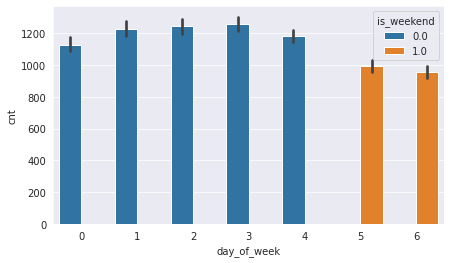

In [ ]:
# with barplot


<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

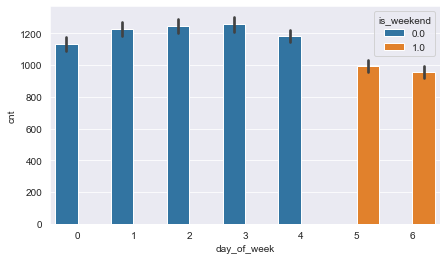

In [73]:
plt.figure(figsize=(7,4))
sns.barplot('day_of_week','cnt',data=df,hue='is_weekend')

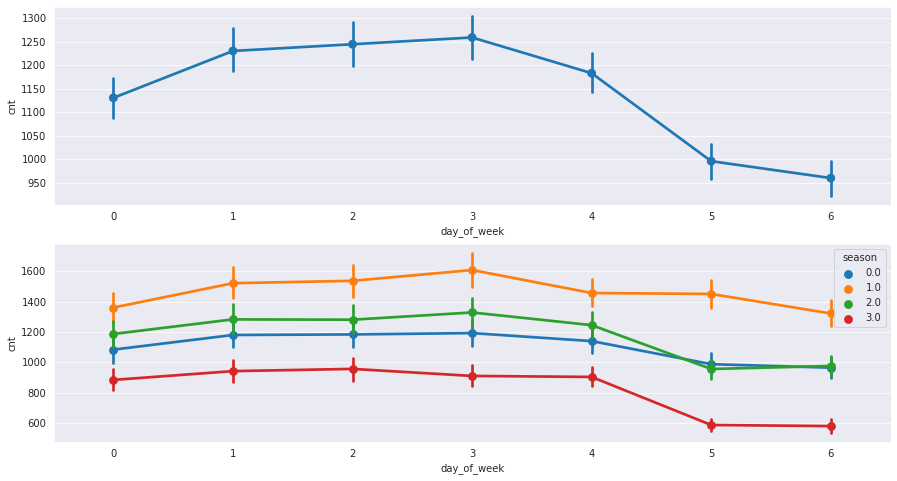

In [ ]:
# with pointplot


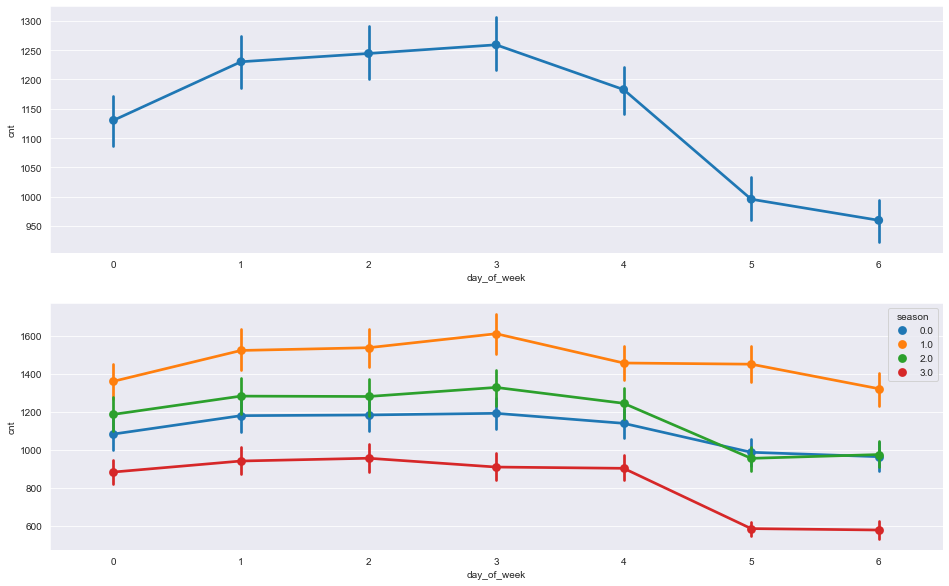

In [82]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
sns.pointplot('day_of_week','cnt',data=df,ax=axes[0])
sns.pointplot('day_of_week','cnt',data=df,ax=axes[1], hue='season')

plt.show()

### 13.Plot bike shares by day of month

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


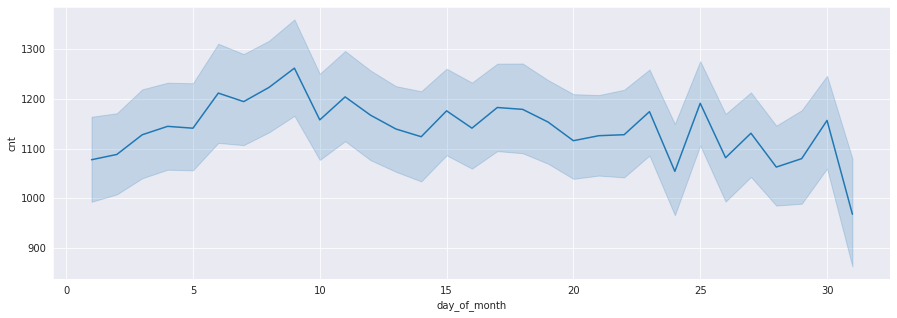

In [ ]:
#with lineplot



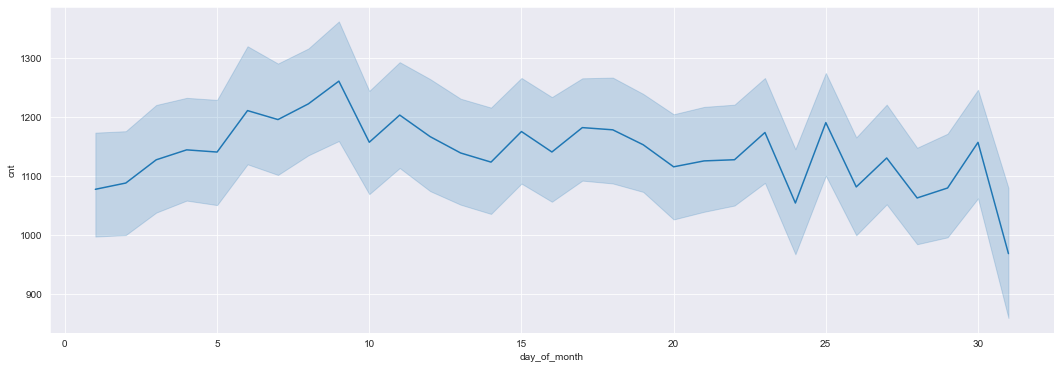

In [98]:
plt.figure(figsize=(18,6))
sns.lineplot('day_of_month','cnt',data=df);

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

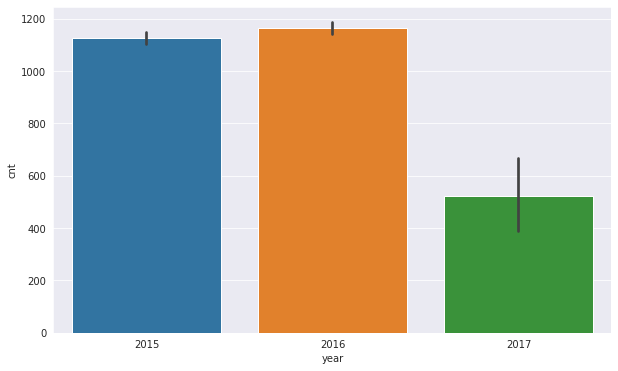

In [11]:
# with barplot


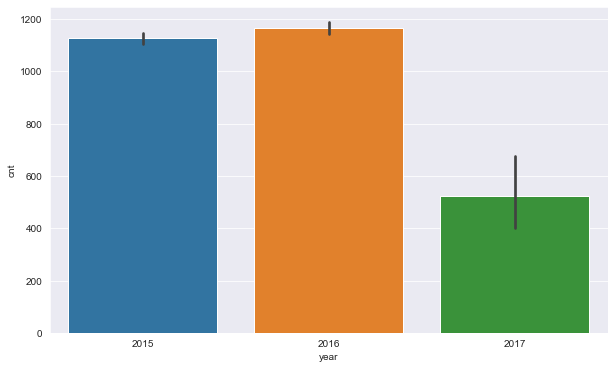

In [101]:
plt.figure(figsize=(10,6))
sns.barplot('year','cnt',data=df);

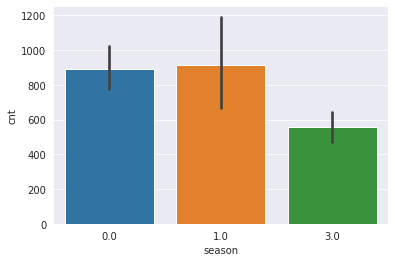

In [12]:
# with barplot

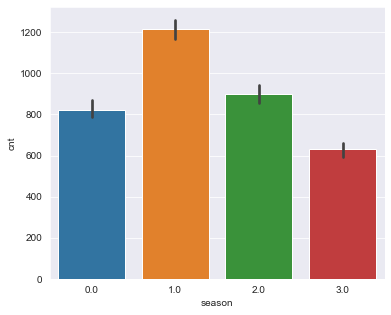

In [122]:
plt.figure(figsize=(6,5))
sns.barplot('season', 'cnt', data=df, estimator=np.median);

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [123]:
df.is_weekend.value_counts()

0.0    12442
1.0     4970
Name: is_weekend, dtype: int64

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

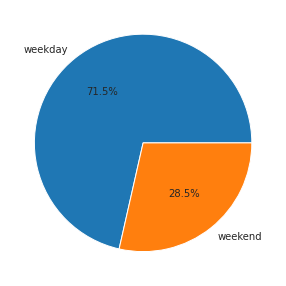

In [ ]:
# pie chart

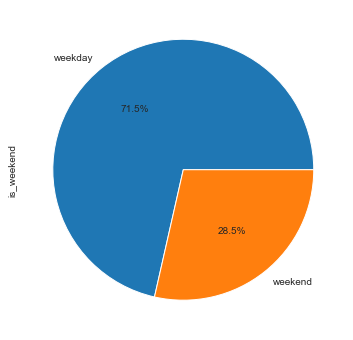

In [130]:
pie, ax = plt.subplots(figsize=(6,6))
labels = ['weekday','weekend']

df.is_weekend.value_counts().plot.pie(autopct="%.1f%%",labels=labels);


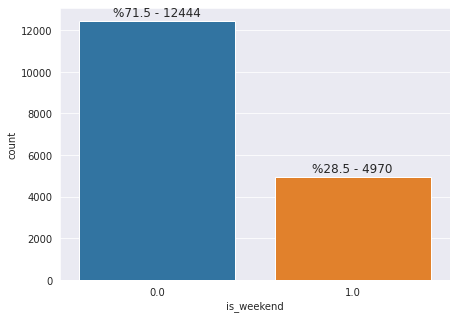

In [ ]:
# with countplot



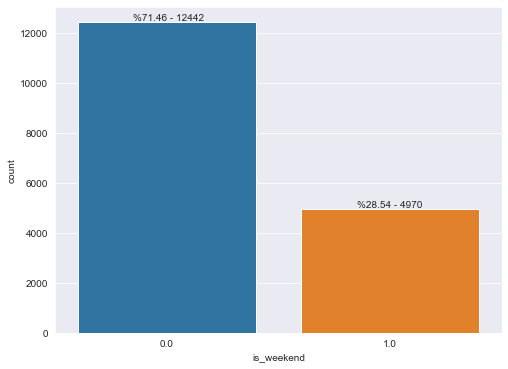

In [166]:
plt.figure(figsize=(8,6))
ax_tip = sns.countplot('is_weekend', data=df)

for p in ax_tip.patches:
    ax_tip.annotate("%"+str(round((p.get_height()/df.is_weekend.count())*100,2)) + " - " +str((p.get_height())), 
                    (p.get_x()+0.25, p.get_height()+50));

### 16.Plot the distribution of weather code by seasons

In [167]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


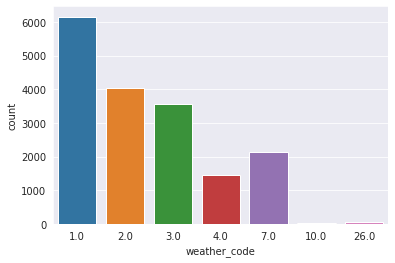

In [ ]:
# with countplot


<AxesSubplot:xlabel='weather_code', ylabel='count'>

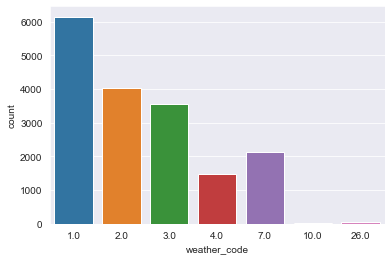

In [169]:
plt.figure()
sns.countplot('weather_code', data=df)

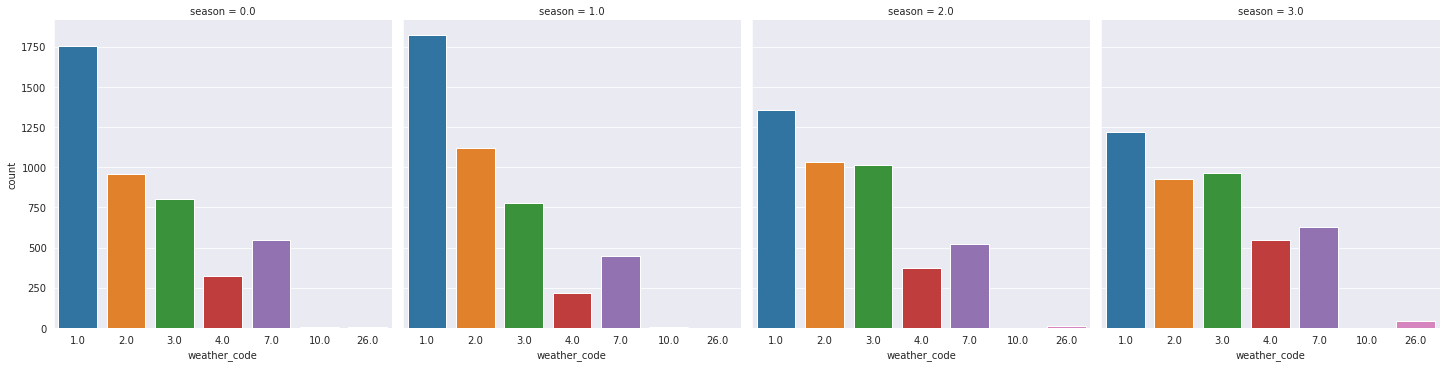

In [ ]:
# with catplot


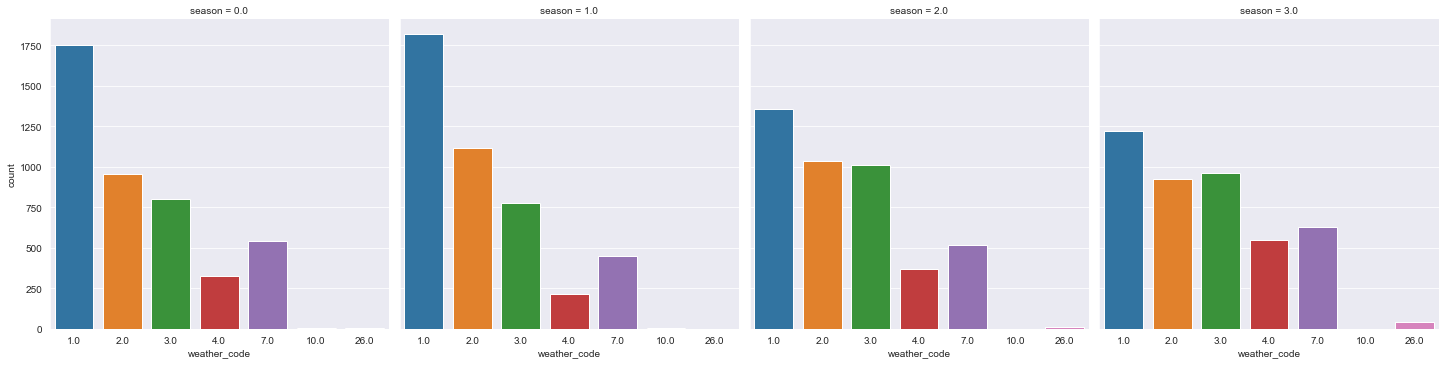

In [190]:
sns.catplot('weather_code',
            data = df,
            kind='count',
            col='season'
           );

### 17.Visulaize all the continuous variables with histogram and scatterplot

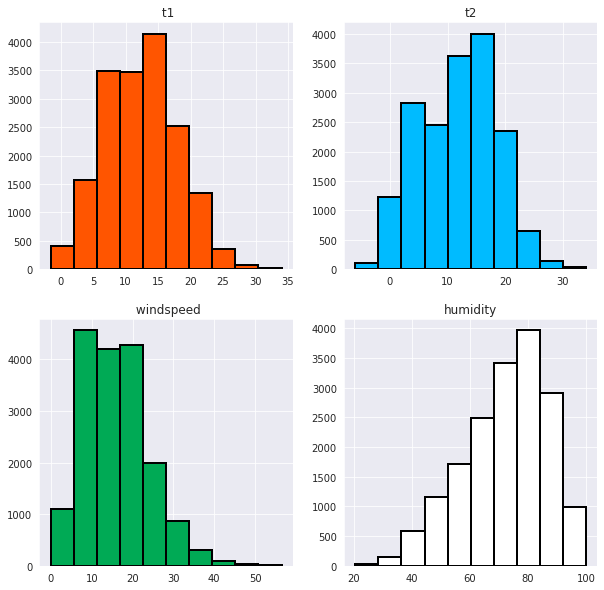

In [ ]:
# matplotlip hist


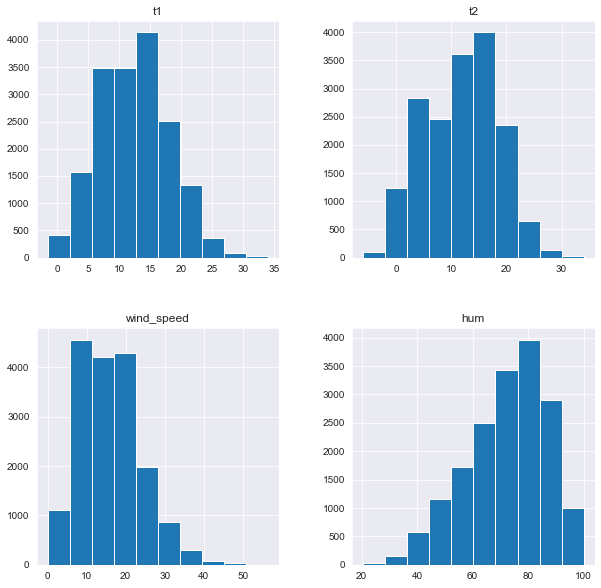

In [197]:
df[['t1', 't2', 'wind_speed', 'hum']].hist(figsize=(10,10))
plt.show()

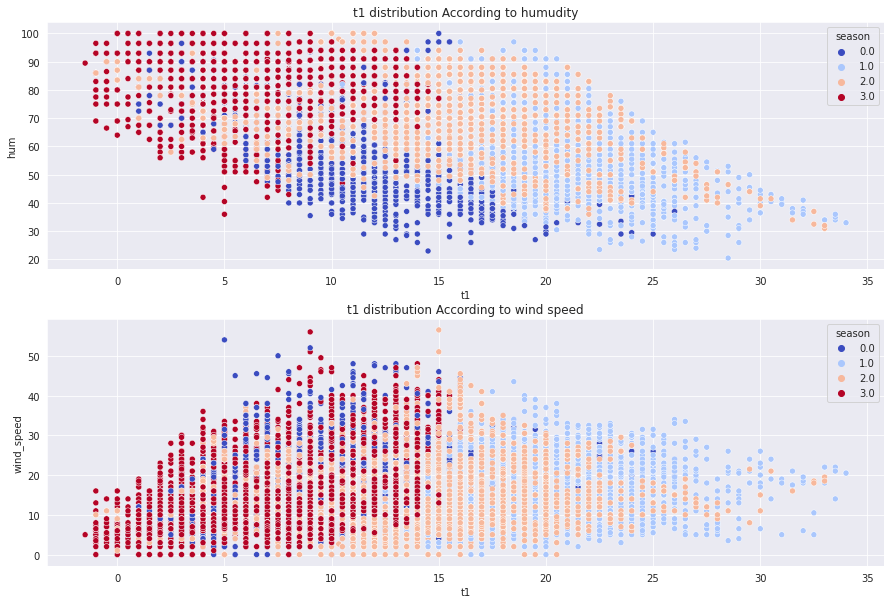

In [ ]:
# matplotlib scatterplot

In [229]:
df1 = df[df.season==0]
df2 = df[df.season==1]
df3 = df[df.season==2]
df4 = df[df.season==3]

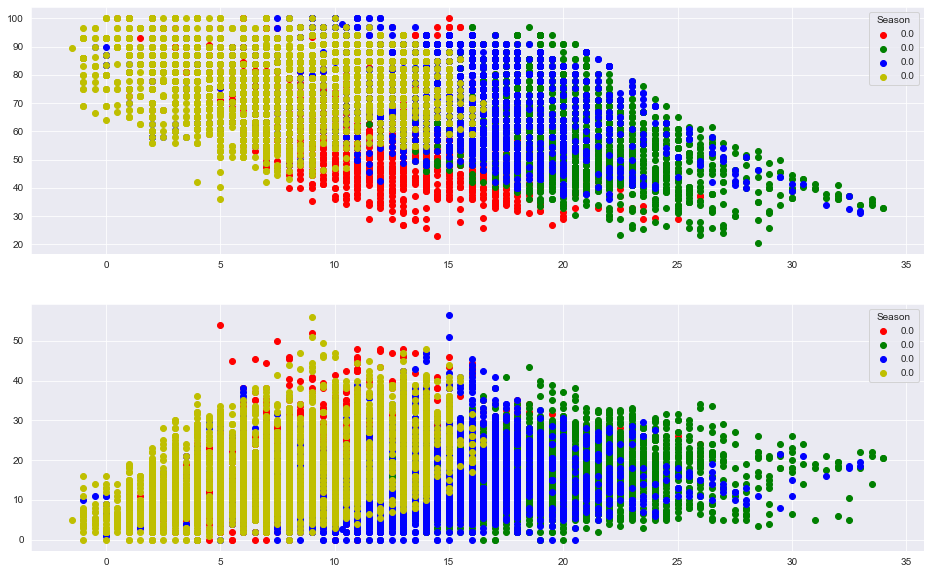

In [233]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

ax1.scatter('t1', 'hum', data=df1, label='0.0', c='r')
ax1.scatter('t1', 'hum', data=df2, label='0.0', c='g')
ax1.scatter('t1', 'hum', data=df3, label='0.0', c='b')
ax1.scatter('t1', 'hum', data=df4, label='0.0', c='y')
ax1.legend(title='Season')


ax2.scatter('t1', 'wind_speed', data=df1, label='0.0', c='r')
ax2.scatter('t1', 'wind_speed', data=df2, label='0.0', c='g')
ax2.scatter('t1', 'wind_speed', data=df3, label='0.0', c='b')
ax2.scatter('t1', 'wind_speed', data=df4, label='0.0', c='y')
ax2.legend(title='Season')




plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___